## 데이터 수집

In [188]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 데이터 정제

In [189]:
# null 값 확인
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [190]:
# age를 중앙값(median())으로 치환
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [191]:
# embarked의 값 확인
print(titanic['embarked'].value_counts())
# 최빈값이 S 임을 확인

# embarked의 결측값을 최빈값 'S'로 치환
titanic['embarked'] = titanic['embarked'].fillna('S')

S    644
C    168
Q     77
Name: embarked, dtype: int64


In [192]:
print(titanic['embark_town'].value_counts())
#최빈값이 Southampton을 확인

# embark_town을 최빈값 Southampton으로 치환
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

# 같은 방법으로 deck도 최빈값 'C'로 치환
titanic['deck'] = titanic['deck'].fillna('C')

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [193]:
# 다시 확인
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [194]:
# 데이터 탐색
print(titanic.info())
print(titanic['survived'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
0    549
1    342
Name: survived, dtype: int64


## 데이터 분석

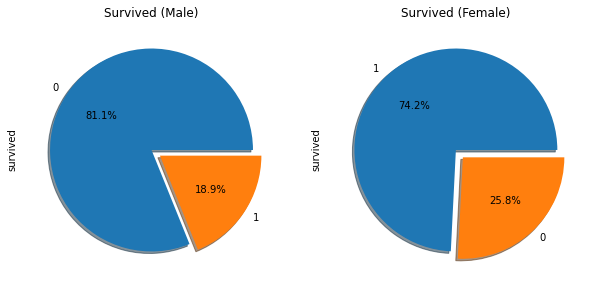

In [195]:
# 남자승객과 여자 승객의 생존률
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize=(10,5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

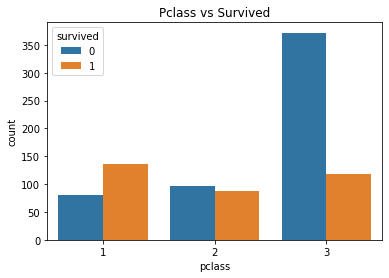

In [196]:
# 등급별 생존자 수
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

## 데이터 모델링

In [197]:
# 피어슨 상관계수를 적용하여 속성들과 생존 사이에 어떤 상관이 있는지 상관계수를 구한다
titanic_corr = titanic.corr(method='pearson')
titanic_corr
# 남자 성인은 생존과 음의 상관관계  즉, 성인 남자일 수록 true(1) 생존률 떨어짐(0)
# 객실 등급은 음의 상관관게         즉, 등급 숫자가 낮을수록(1,2,3중에 1) 생존률 올라감(1)
# 객실 요금은 양의 상관관계         즉, 요금이 높을 수록 생존률 올라감

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [198]:
# 특정 변수 사이의 상관계수 구하기

# 생존률과 남자성인의 상관계수
print(titanic['survived'].corr(titanic['adult_male']))

# 생존률과 요금의 상관계수
print(titanic['survived'].corr(titanic['fare']))

-0.5570800422053228
0.25730652238496216


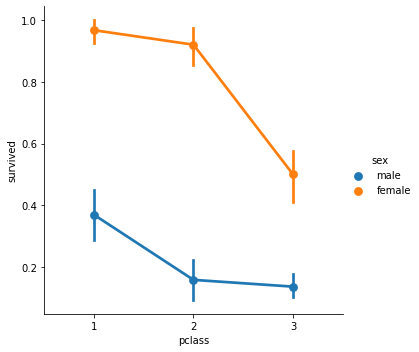

In [199]:
# 두 변수의 상관관계 시각화
# 객실 등급, 성별과 생존의 상관관계
sns.catplot(x='pclass', y='survived',hue='sex', data=titanic, kind='point')
plt.show()

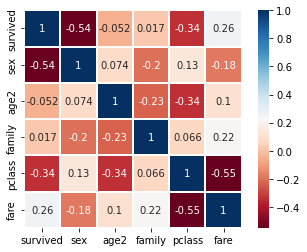

In [200]:
# 변수 사이의 상관 계수를 히트맵으로 시각화
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":10})
plt.show()